In [2]:
# ROC curve

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier # k 근접이웃 
from sklearn.ensemble import RandomForestClassifier # 앙상블_랜덤 포레스트
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [9]:
# roc curve 함수 정의
def plot_roc_curve(fpr,tpr) :
    plt.plot(fpr, tpr,color = 'purple',label = 'ROC')
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristics(ROC) Curve')
    plt.legend # 범례
    plt.show()
    
# fpr(false positive rate,: 특이도(틀리도?))
#fpr(true positive rate : 민감도,재현율)

In [11]:
data_X , class_label = make_classification(n_samples = 1000,n_classes = 2, weights = [1,1], random_state=1) #샘플의 개수, 클래스 = 2(x,y),  x,y에 다 1씩 주겠다, 시드 = 1

In [12]:
# Train, Test 분리
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size = 0.3, random_state = 1) # 예측값, 실제값

In [14]:
# random forest model 적용

model = RandomForestClassifier()
model.fit(train_X,train_y) # fit은 반드시 train  data로

RandomForestClassifier()

In [15]:
# 테스트 데이터 셋으로 예측(확률 예측)

print(model.predict(test_X)) # 모델 예측 결과값

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0]


In [16]:
model.predict_proba(test_X) # 모델 예측 결과값이 나올 확률


array([[0.95, 0.05],
       [0.1 , 0.9 ],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.1 , 0.9 ],
       [0.15, 0.85],
       [0.2 , 0.8 ],
       [0.06, 0.94],
       [0.16, 0.84],
       [0.92, 0.08],
       [0.23, 0.77],
       [0.03, 0.97],
       [0.96, 0.04],
       [0.22, 0.78],
       [0.26, 0.74],
       [0.97, 0.03],
       [0.07, 0.93],
       [0.9 , 0.1 ],
       [0.1 , 0.9 ],
       [0.98, 0.02],
       [0.89, 0.11],
       [0.81, 0.19],
       [0.19, 0.81],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.24, 0.76],
       [0.96, 0.04],
       [0.19, 0.81],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.98, 0.02],
       [0.86, 0.14],
       [0.15, 0.85],
       [0.31, 0.69],
       [0.22, 0.78],
       [0.86, 0.14],
       [0.96, 0.04],
       [0.73, 0.27],
       [0.15, 0.85],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.29, 0.71],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.21, 0.79],
       [0.92, 0.08],
       [0.25, 0.75],
       [0.1 ,

In [17]:
probs = model.predict_proba(test_X) 

In [18]:
# 성능 평가

# positive class만 유지
probs[:, 1]

array([0.05, 0.9 , 0.07, 0.06, 0.9 , 0.85, 0.8 , 0.94, 0.84, 0.08, 0.77,
       0.97, 0.04, 0.78, 0.74, 0.03, 0.93, 0.1 , 0.9 , 0.02, 0.11, 0.19,
       0.81, 0.87, 0.83, 0.76, 0.04, 0.81, 0.83, 0.85, 0.02, 0.14, 0.85,
       0.69, 0.78, 0.14, 0.04, 0.27, 0.85, 0.03, 0.  , 0.71, 0.  , 0.25,
       0.79, 0.08, 0.75, 0.9 , 0.79, 0.05, 0.03, 0.79, 0.04, 0.08, 0.04,
       0.05, 0.79, 0.91, 0.12, 0.07, 0.61, 0.03, 0.98, 0.1 , 0.11, 0.42,
       0.02, 0.53, 0.89, 0.53, 0.87, 0.04, 0.86, 0.03, 0.11, 0.96, 0.02,
       0.93, 0.83, 0.9 , 0.08, 0.06, 0.66, 0.97, 0.19, 0.78, 0.  , 0.02,
       0.56, 0.58, 0.92, 0.83, 0.52, 0.02, 0.9 , 0.28, 0.92, 0.81, 0.07,
       0.04, 0.8 , 0.01, 0.72, 0.06, 0.03, 0.89, 0.05, 0.77, 0.56, 0.67,
       0.84, 0.02, 0.8 , 0.85, 0.96, 0.92, 0.85, 0.04, 0.93, 0.02, 0.04,
       0.03, 0.  , 0.9 , 0.77, 0.05, 0.84, 0.93, 0.88, 0.95, 0.89, 0.  ,
       0.89, 0.81, 0.41, 0.84, 0.02, 0.87, 0.91, 0.76, 0.9 , 0.63, 0.07,
       0.03, 0.8 , 0.1 , 0.83, 0.23, 0.07, 0.78, 0.

In [19]:
probs = probs[:,1]

In [20]:
# auc 구하기

roc_auc_score(test_y,probs) # test data의 실제값, 예측값 auc값(예측치, 특이점 그래프의 아래 면적)

0.9545373506863969

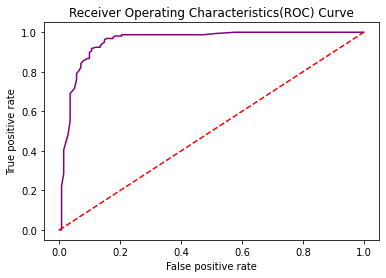

In [21]:
auc  = roc_auc_score(test_y,probs)

# roc curve 곡선 그리기
fpr, tpr, thresholds = roc_curve(test_y,probs)
plot_roc_curve(fpr,tpr) # 아래 면적이 auc